<a href="https://colab.research.google.com/github/JoDeMiro/FuzzyBevezetes/blob/main/Python_Fuzzy_SOM_LOM_MOM_COG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# https://github.com/JoDeMiro/FuzzyLogic

In [3]:
%%capture
!pip install scikit-fuzzy

In [4]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

import ipywidgets as widgets
import matplotlib.pyplot as plt

from ipywidgets import IntSlider
from ipywidgets import HTML
from ipywidgets import interact, interactive, fixed, interact_manual

Ezt próbálom valahogy modellezni.

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.9.6988&rep=rep1&type=pdf

Illetve a saját számításaimat szeretném visszaellenőrizni.

Két bemeneti változó van egyenként két-két tagsági függvénnyel.
<br>
A tagsági függvények alakjukat tekintve háromszög alakúak.
<br>
Egy kimeneti változó van három tagsági függvénnyel.
<br>
A szbályrendszerben négy szabály van.


In [5]:
# Create universe

bemenet1         = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'bemenet1')

bemenet2         = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'bemenet2')

kimenet          = ctrl.Consequent(np.arange(0, 40.1, 0.1), 'kimenet')

<img src="https://github.com/JoDeMiro/Data/raw/main/Bucket/Temp.png"/>

In [6]:
kimenet.defuzzify_method = 'centroid'
kimenet.universe.mean()

20.0

No handles with labels found to put in legend.


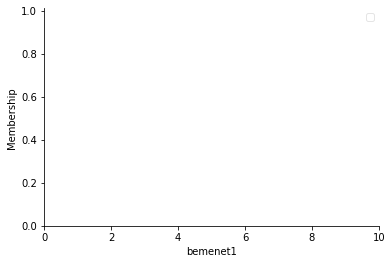

In [7]:
bemenet1.view()

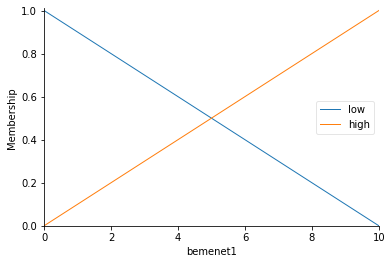

In [8]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a felhőtakaró{napos})

bemenet1['low']  = fuzzy.trapmf(bemenet1.universe, [0, 0, 0, 10])
bemenet1['high'] = fuzzy.trapmf(bemenet1.universe, [0, 10, 10, 10])

bemenet1.view()

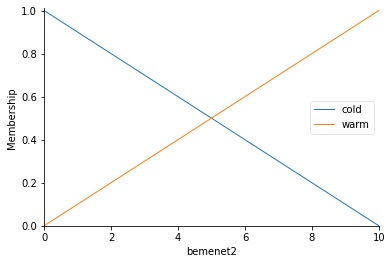

In [9]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a felhőtakaró{napos})

bemenet2['cold'] = fuzzy.trapmf(bemenet2.universe, [0, 0, 0, 10])
bemenet2['warm'] = fuzzy.trapmf(bemenet2.universe, [0, 10, 10, 10])

bemenet2.view()

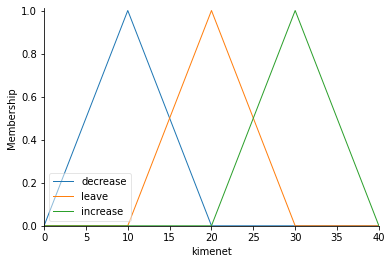

In [10]:
# Most készítsük el a Borravaló változó tagsági függvyényeit is {kevés, közepes, nagyvonalú}

kimenet['decrease'] = fuzzy.trimf(kimenet.universe, [0, 10, 20])
kimenet['leave']    = fuzzy.trimf(kimenet.universe, [10, 20, 30])
kimenet['increase'] = fuzzy.trimf(kimenet.universe, [20, 30, 40])

kimenet.view()

In [11]:
# Most készítsük el a szabályokat

rule1 = ctrl.Rule(antecedent= bemenet1['low']  & bemenet2['cold'], consequent = kimenet['decrease'])

rule2 = ctrl.Rule(antecedent= bemenet1['low']  & bemenet2['warm'], consequent = kimenet['leave'])

rule3 = ctrl.Rule(antecedent= bemenet1['high'] & bemenet2['cold'], consequent = kimenet['leave'])

rule4 = ctrl.Rule(antecedent= bemenet1['high'] & bemenet2['warm'], consequent = kimenet['increase'])

# rule4 = ctrl.Rule(antecedent= bemenet1['high'] | bemenet2['warm'], consequent = kimenet['increase'])


In [12]:
def fuzzyDemo(bemenet1_ = 3, bemenet2_ = 8):

  # a szabályok
  print(rule1)
  print(rule2)
  print(rule3)
  print(rule4)

  # négy szabályunk van
  system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['bemenet1'] = bemenet1_
  simulation.input['bemenet2'] = bemenet2_

  simulation.compute()

  print('----------------------------------------')
  print('kimenet  :', simulation.output['kimenet'])
  print('----------------------------------------')
  print(simulation.input)

  bemenet1.view(sim = simulation)
  bemenet2.view(sim = simulation)
  kimenet.view(sim = simulation)

  return simulation


## Igy is vissza lehet kapni az adott bemenet tagsággi függvényhez tartozó értékét

In [13]:
print(bemenet1.universe.shape)

# bemenet1['low'] = fuzzy.gaussmf(Felszolgálás.universe, 5, 1.5)
mfx = fuzzy.trapmf(bemenet1.universe, [0, 0, 0, 10])
print(mfx.shape)

# mik a tagsággi függvényhez tartozó értékek a következ pontokban (1, 2, 3.5, 5)
fuzzy.interp_membership(bemenet1.universe, mfx, [1.0, 2.0, 3.5, 5.0])

(101,)
(101,)


array([0.9 , 0.8 , 0.65, 0.5 ])

In [14]:
print(bemenet1.__len__())
print(bemenet1.__getitem__('low'))
a = bemenet1.__getitem__('low')
print(type(a))
b = a.membership_value
print(type(b))
a.mf

# Elég bonyolultan de le lehet hívni bemenet1 objektumból a magát a tagsági függvényt (mf)
fuzzy.interp_membership(bemenet1.universe, bemenet1.__getitem__('low').mf, [1, 2, 3.5, 5])

101
bemenet1[low]
<class 'skfuzzy.control.term.Term'>
<class 'skfuzzy.control.state.StatePerSimulation'>


array([0.9 , 0.8 , 0.65, 0.5 ])

In [15]:
# ide kéne egy olyan plotot raknom ami mutatja az adott függvényt,
# és mutatja az egyes x, hez tartozó értéket minkét (ha egynél több átviteli függvényhez is tartozik az y)

OrderedDict([('low', bemenet1[low]), ('high', bemenet1[high])])
bemenet1['low'](3) : 	0.70
bemenet1['high'](3) : 	0.30


Text(31, 0.3, '0.30')

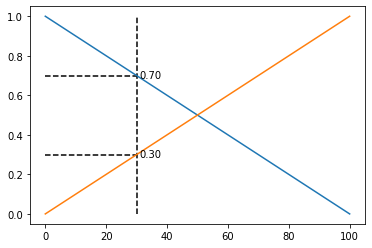

In [16]:
plt.plot(bemenet1['low'].mf)
plt.plot(bemenet1['high'].mf)

print(bemenet1.terms)

# Elég bonyolultan de le lehet hívni bemenet1 objektumból a magát a tagsági függvényt (mf)
y_bemenet1_low    = fuzzy.interp_membership(bemenet1.universe, bemenet1.__getitem__('low').mf, [3])
y_bemenet1_high   = fuzzy.interp_membership(bemenet1.universe, bemenet1.__getitem__('high').mf, [3])


print("bemenet1['low'](3) : \t{0:0.2f}".format(y_bemenet1_low[0]))
print("bemenet1['high'](3) : \t{0:0.2f}".format(y_bemenet1_high[0]))

plt.vlines(30, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')

plt.hlines(y_bemenet1_low, xmin = 0, xmax = 30, colors = 'k', linestyles = 'dashed')
plt.hlines(y_bemenet1_high, xmin = 0, xmax = 30, colors = 'k', linestyles = 'dashed')

plt.text(31, y_bemenet1_low[0], '{:0.2f}'.format(y_bemenet1_low[0]), verticalalignment = 'center')
plt.text(31, y_bemenet1_high[0], '{:0.2f}'.format(y_bemenet1_high[0]), verticalalignment ='center')


## Defuzzify this membership function five ways

In [17]:
mfx = bemenet1.__getitem__('low').mf
mx  = np.arange(0, 10.1, 0.1)

ymax  = [0.6666666666666669, 0.7071067811865474, 1.0, 1.0, 1.0]
xvals = [3.3333333333333313, 2.9289321881345263, 0.0, 0.0, 0.0]


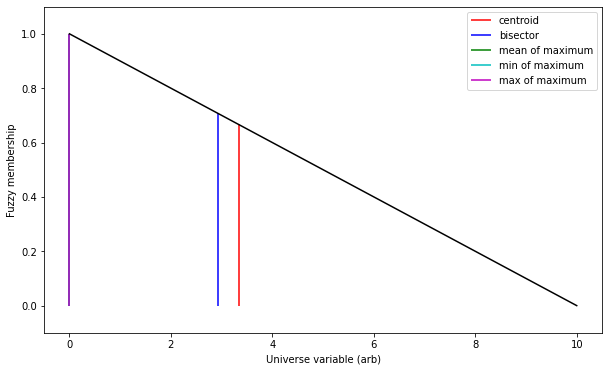

In [18]:
defuzz_centroid = fuzzy.defuzz(mx, mfx, 'centroid')
defuzz_bisector = fuzzy.defuzz(mx, mfx, 'bisector')
defuzz_mom = fuzzy.defuzz(mx, mfx, 'mom')
defuzz_som = fuzzy.defuzz(mx, mfx, 'som')
defuzz_lom = fuzzy.defuzz(mx, mfx, 'lom')

names = [defuzz_centroid, defuzz_bisector, defuzz_mom, defuzz_som, defuzz_lom]


# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzzy.interp_membership(mx, mfx, i) for i in xvals]

print('ymax  =', ymax)
print('xvals =', xvals)


#  Display and compare defuzzification results against membership function
plt.figure(figsize=(10, 6))

plt.plot(mx, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=1)

plt.show()

In [19]:
bemenet1.terms

OrderedDict([('low', bemenet1[low]), ('high', bemenet1[high])])

In [20]:
# Elég bonyolultan de le lehet hívni bemenet1 objektumból a magát a tagsági függvényt (mf)
fuzzy.interp_membership(bemenet1.universe, bemenet1.__getitem__('low').mf, [8])

array([0.2])

In [21]:
for key in bemenet2.terms.keys():
  print(key)

cold
warm


bemenet2['cold'](3) : 	0.20
bemenet2['warm'](3) : 	0.80


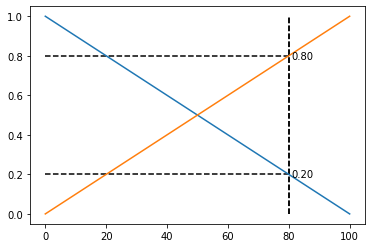

In [22]:
for key in bemenet2.terms.keys():
  plt.plot(bemenet2[key].mf)

  value = fuzzy.interp_membership(bemenet2.universe, bemenet2.__getitem__(key).mf, [8])

  print("bemenet2['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

  plt.vlines(80, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
  plt.hlines(value, xmin = 0, xmax = 80, colors = 'k', linestyles = 'dashed')
  plt.text(81, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')


In [23]:
# Tehát a bemeneti változók és a hozzá tartozó értékeke a következőek

# Felszolgálás = 3 -> Felszolgálás['rossz'](0.14) és Felszolgálás['jó'](0.41)

# Étel = 8 -> Étel['pocsék](0.00) sé Étel['finom'](0.5)


# Tekintsük most át a szabályokat

# rule1 = ctrl.Rule(antecedent= Felszolgálás['rossz'] | Étel['pocsék'], consequent = Borravaló['kevés'])

# Felszolgálás['rossz'](0.14) OR Étel['pocsék'](0.00) -> Borravaló['kevés'] -> max(0.14, 0.00) = 0.14


# rule2 = ctrl.Rule(antecedent= Felszolgálás['jó'], consequent = Borravaló['közepes'])

# Felszolgálás['jó'](0.41) -> Borravaló['közepes'] = 0.41


# rule3 = ctrl.Rule(antecedent= Felszolgálás['kiválló'] | Étel['finom'], consequent = Borravaló['nagyvonalú'])

# Felszolgálás['kiválló'](0.00) OR Étel['finom'](0.5) -> Borravaló['nagyvonalú'] -> max(0.00, 0.50) = 0.50



# Aggregáció

# Tehát a három szabály alapján a kimeneti változó (Borravaló) mindhárom {kevés, közepes, nagyvonalú} tagsági függvény aktív lesz

# A fenti számítások alapján a következő képen

# rule1 -> Borravaló['kevés'] = 0.14
# rule2 -> Borravaló['közepes'] = 0.41
# rule3 -> Borravoló['nagyvonalú'] = 0.5


# De-Fuzzyfikáció

# Borravaló = w1 * COG(Borravaló['kevés']) + w2 * COG(Borravaló['közepes']) + w3 * COG(Borravaló['nagyvonalú']) / (w1 + w2 + w3)

# Borravaló = ( 0.14 * 5 + 0.41 * 15 + 0.5 * 25 ) / ( 0.14 + 0.41 + 0.5 )

# Borravaló = 18.42

( 0.14 * 5 + 0.41 * 15 + 0.5 * 25 ) / ( 0.14 + 0.41 + 0.5 )

18.42857142857143

In [24]:
kimenet.defuzzify_method = 'centroid'

IF bemenet1[low] AND bemenet2[cold] THEN kimenet[decrease]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF bemenet1[low] AND bemenet2[warm] THEN kimenet[leave]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF bemenet1[high] AND bemenet2[cold] THEN kimenet[leave]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF bemenet1[high] AND bemenet2[warm] THEN kimenet[increase]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
kimenet  : 20.886524822694945
----------------------------------------
bemenet1 : 3
bemenet2 : 8



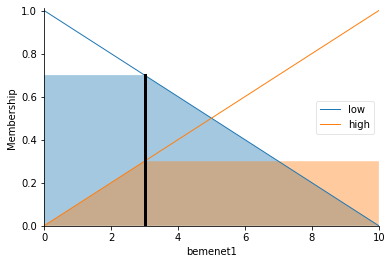

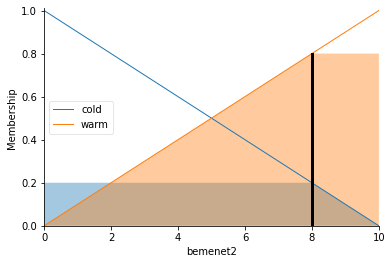

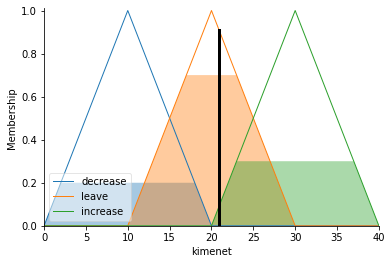

In [25]:
sim = fuzzyDemo()

In [26]:
f = interact(fuzzyDemo, bemenet1_ = (0, 10), bemenet2_ = (0, 10));

interactive(children=(IntSlider(value=3, description='bemenet1_', max=10), IntSlider(value=8, description='bem…

In [27]:
kimenet.defuzzify_method = 'lom'

f = interact(fuzzyDemo, bemenet1_ = (0, 10), bemenet2_ = (0, 10));

interactive(children=(IntSlider(value=3, description='bemenet1_', max=10), IntSlider(value=8, description='bem…

### Eddig jó

Az már kiderült, hogy a kimenet.defuzzyfy_method = 'som' segítségével meg tudom adni, hogy milyen defuzzifikációs eljárással számolja ki az eredményeket és ez működik is.

Most csináljunk egy rövidített interaktív demot ahol a defuzzifikáció módja is állítható paraméter.

In [28]:
def fuzzyDemoB(bemenet1_ = 3, bemenet2_ = 8, mode_ = ['centroid']):

  # set defuz
  kimenet.defuzzify_method = mode_

  # négy szabályunk van
  system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['bemenet1'] = bemenet1_
  simulation.input['bemenet2'] = bemenet2_

  simulation.compute()

  print('----------------------------------------')
  print('kimenet  :', simulation.output['kimenet'])
  print('----------------------------------------')
  print(simulation.input)

  kimenet.view(sim = simulation)
  bemenet1.view(sim = simulation)
  bemenet2.view(sim = simulation)
  
  return simulation


In [29]:
f = interact(fuzzyDemoB, bemenet1_ = (0, 10), bemenet2_ = (0, 10), mode_ = ['centroid','bisector', 'mom', 'som', 'lom']);

interactive(children=(IntSlider(value=3, description='bemenet1_', max=10), IntSlider(value=8, description='bem…

### Csináljunk egy egyszerűbb szimulációt

Abban az értelemben, hogy direkt módon lehessen megadni, hogy a kimeneten milyen tagsági függvény értékek legyen.

Ez egy dirty hack lesz.

Egyszerűen csinálok három bemeneti változót és mindegyikhez tartozó illetékességi értéket fogom a kimeneti válotzó egyes halmazaihoz rendelni.

<img src="https://github.com/JoDeMiro/Data/raw/main/Bucket/Temp.png"/>

In [30]:
# Create universe

in1         = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'in1')
in2         = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'in2')
in3         = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'in3')

out         = ctrl.Consequent(np.arange(0, 40.1, 0.1), 'out')

In [31]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a felhőtakaró{napos})

in1['value']  = fuzzy.trapmf(in1.universe, [0, 10, 10, 10])
in2['value']  = fuzzy.trapmf(in2.universe, [0, 10, 10, 10])
in3['value']  = fuzzy.trapmf(in3.universe, [0, 10, 10, 10])

# in1.view()

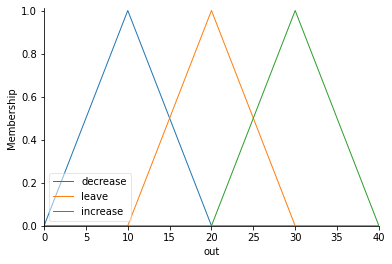

In [32]:
# Most készítsük el az out változó tagsági függvyényeit is {decrease, leave, increase}

out['decrease'] = fuzzy.trimf(out.universe, [0, 10, 20])
out['leave']    = fuzzy.trimf(out.universe, [10, 20, 30])
out['increase'] = fuzzy.trimf(out.universe, [20, 30, 40])

out.view()

In [33]:
# Most készítsük el a szabályokat

rule1 = ctrl.Rule(antecedent= in1['value'], consequent = out['decrease'])
rule2 = ctrl.Rule(antecedent= in2['value'], consequent = out['leave'])
rule3 = ctrl.Rule(antecedent= in3['value'], consequent = out['increase'])


In [34]:
def fuzzyDemoS(in1_ = 3, in2_ = 8, in3_ = 2, mode_ = 'centroid'):

  # set defuz
  out.defuzzify_method = mode_

  # négy szabályunk van
  system = ctrl.ControlSystem([rule1, rule2, rule3])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['in1'] = in1_
  simulation.input['in2'] = in2_
  simulation.input['in3'] = in3_

  simulation.compute()

  print('----------------------------------------')
  print('out  :', simulation.output['out'])
  print('----------------------------------------')
  # print(simulation.input)

  out.view(sim = simulation)
  in1.view(sim = simulation)
  in2.view(sim = simulation)
  in3.view(sim = simulation)
  
  return simulation


In [35]:
f = interact(fuzzyDemoS, in1_ = (0, 10), in2_ = (0, 10), in3_ = (0, 10), mode_ = ['centroid','bisector', 'mom', 'som', 'lom']);

interactive(children=(IntSlider(value=3, description='in1_', max=10), IntSlider(value=8, description='in2_', m…

## A teljes kimeneti tér ábrázolása a két bemeneti változó függvényében

In [40]:

# A kiértékelés nagyobb felbontással is elvégezhető de több számítással jár

in1_space = np.linspace(0, 10, 10)
in2_space = np.linspace(0, 10, 10)
in3_space = np.linspace(0, 10, 10)

x, y = np.meshgrid(in1_space, in2_space)
z = np.zeros_like(x)

# Setup Defuz
out.defuzzify_method = 'centroid'

# Setup system
system = ctrl.ControlSystem([rule1, rule2, rule3])
simulation = ctrl.ControlSystemSimulation(system)

# Loop through the system 10*10 times to collect the control surface
for i in range(len(in1_space)):
  for j in range(len(in2_space)): 
    simulation.input['in1'] = x[i, j]
    simulation.input['in2'] = y[i, j]
    simulation.input['in3'] = 5
    simulation.compute()
    z[i, j] = simulation.output['out']

In [41]:
# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

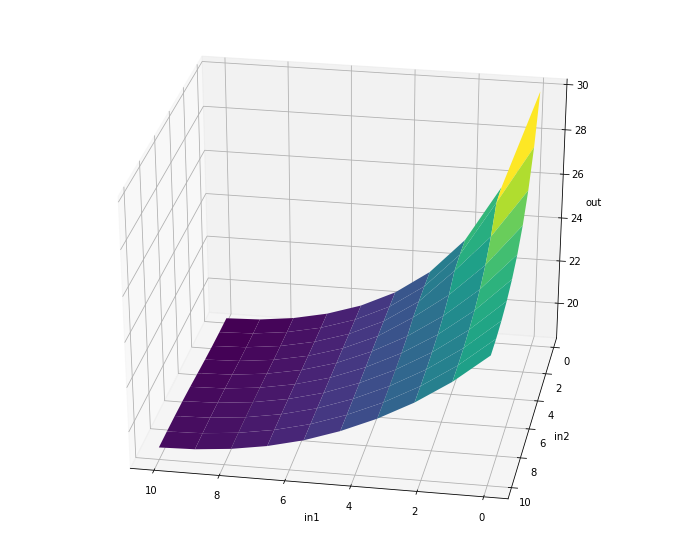

In [47]:
# Plot the result in pretty 3D with alpha blending

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('in1')
ax.set_ylabel('in2')
ax.set_zlabel('out')

surf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)

cset = ax.contourf(x, y, z, zdir = 'z', offset = -2.5, cmap = 'viridis', alpha = 0.5)

ax.view_init(30, 100)


```
# Köszönöm a figyelmet
```

```
     Istvan Pintye
     ---------------------------------------------------------
     MTA SZTAKI Computer and Automation Research Institute
                Hungarian Academy of Sciences,
     Laboratory of Parallel and Distributed Systems
     Postal    : P.O.Box 63. H-1518 Budapest, Hungary
     Location  : 1132 Budapest Victor Hugo u. 18-22. Hungary
     Phone/Fax : +36 1 329-78-64 (secretary)
     Mobile    : +36 30 822-5188
     E-mail    : pintye@sztaki.hu
     ---------------------------------------------------------
```

